In [1]:
import numpy as np, healpy as hp, pickle, curvedsky as cs, tqdm, sys
from matplotlib.pyplot import *
import local, tools_cmb
import binning, plottools as pl

/global/homes/t/toshiyan/Work/Lib/actlib/actsims/actsims/noise.py:9: UserWarning: No pyfftw found. Using much slower numpy fft engine.
  if 'fftw' not in pfft.engine: warnings.warn("No pyfftw found. Using much slower numpy fft engine.")


In [2]:
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/actsims/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/soapack/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/orphics/")
sys.path.append("/global/homes/t/toshiyan/Work/Lib/actlib/tilec/")
from pixell import enmap
from soapack import interfaces

In [3]:
#qids = ['boss_d02','boss_02']
#qids = ['s16_d01','s16_d02']
qids = ['boss_d01','boss_01','boss_d02','boss_02','boss_d03','boss_03','boss_d04','boss_04','s16_d01','s16_d02','s16_d03']
kwargs = {'snmin':0,'snmax':10}

In [4]:
aobj = {}
for q in qids:
    aobj[q]= local.init_analysis_params(qid=q,**kwargs)

In [5]:
maps_c = enmap.read_map(aobj['s16_d03'].fmap['s'][0])[0]

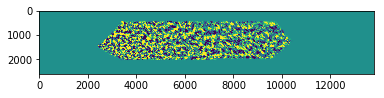

In [6]:
imshow(maps_c,vmin=-2e-2,vmax=2e-2)

In [7]:
alm_c = tools_cmb.map2alm_core(maps_c,lmax=aobj[q].lmax,nside=aobj[q].nside)
map_dat = cs.utils.hp_alm2map(2048,aobj[q].lmax,aobj[q].lmax,alm_c)

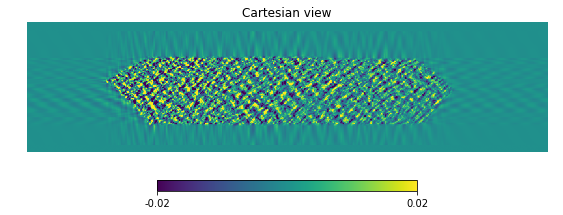

In [8]:
hp.visufunc.cartview(map_dat,lonra=[-200,-100],latra=[0,25],min=-2e-2,max=2e-2)

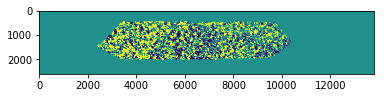

In [9]:
maps_s = enmap.read_map(aobj['s16_d03'].fmap['s'][1])[0]
maps_n = enmap.read_map(aobj['s16_d03'].fmap['n'][1])[0]
imshow(maps_s+maps_n,vmin=-2e-2,vmax=2e-2)

In [10]:
alm_c = tools_cmb.map2alm_core(maps_s+maps_n,lmax=aobj[q].lmax,nside=aobj[q].nside)

In [11]:
map_sim = cs.utils.hp_alm2map(2048,aobj[q].lmax,aobj[q].lmax,alm_c)

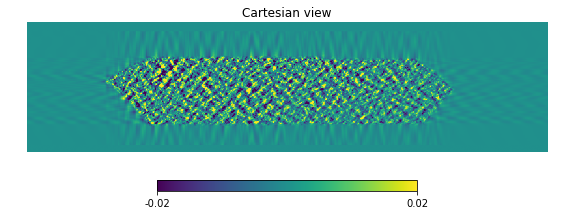

In [12]:
hp.visufunc.cartview(map_sim,lonra=[-200,-100],latra=[0,25],min=-2e-2,max=2e-2)